# CytoNormPy - Plotting

This vignettes showcases the plotting functionality of cytonormpy!

We use the builtin cytonorm object.

In [1]:
import cytonormpy as cnp
import warnings

warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cn = cnp.example_cytonorm()

normalized file Gates_PTLG028_Unstim_Control_2.fcs
normalized file Gates_PTLG021_Unstim_Control_2.fcs
normalized file Gates_PTLG034_Unstim_Control_2.fcs


In [2]:
cnpl = cnp.Plotter(cytonorm = cn)

In [3]:
files = cn._datahandler.all_file_names
files

['Gates_PTLG021_Unstim_Control_1.fcs',
 'Gates_PTLG028_Unstim_Control_1.fcs',
 'Gates_PTLG034_Unstim_Control_1.fcs',
 'Gates_PTLG021_Unstim_Control_2.fcs',
 'Gates_PTLG028_Unstim_Control_2.fcs',
 'Gates_PTLG034_Unstim_Control_2.fcs']

## Scatter plots

We can plot scatter plots, visualizing the data as a dot plot.

If we display the reference, the datapoints of the corresponding reference file will be shown. In this case, we display the original and transformed data points for 'Gates_PTLG021_Unstim_Control_2.fcs', while 'Gates_PTLG021_Unstim_Control_1.fcs' served as a control.

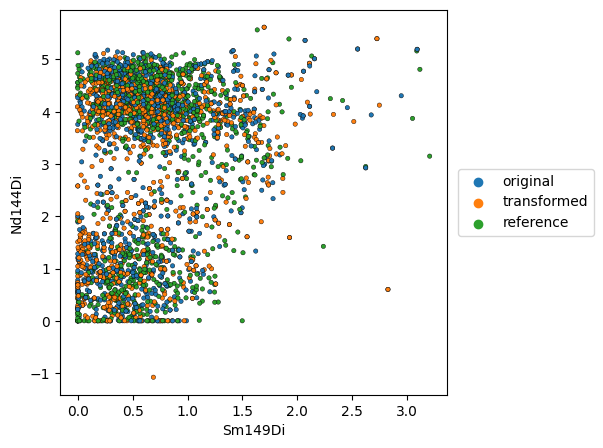

In [4]:
cnpl.scatter(file_name = files[3],
             x_channel = "Sm149Di",
             y_channel = "Nd144Di",
             x_scale = "linear",
             y_scale = "linear",
             display_reference = True,
             figsize = (5,5),
             s = 10,
             edgecolor = "black",
             linewidth = 0.3)

## Histogram plots

By using a histogram plot, we can closely follow the respective distributions before and after normalization.

If we display the reference, the datapoints of the corresponding reference file will be shown. In this case, we display the original and transformed data points for 'Gates_PTLG021_Unstim_Control_2.fcs', while 'Gates_PTLG021_Unstim_Control_1.fcs' served as a control.

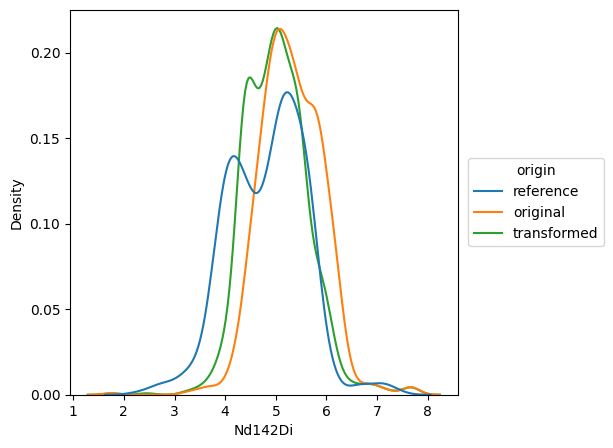

In [5]:
cnpl.histogram(file_name = files[3],
               x_channel = "Nd142Di",
               x_scale = "linear",
               display_reference = True,
               figsize = (5,5))

## Spline Plots

To visualize the spline functions created by cytonormpy, we use the splineplot.

This plot shows the expression values of the file against the goal distribution. Further, the specified quantiles of the expression values are marked.

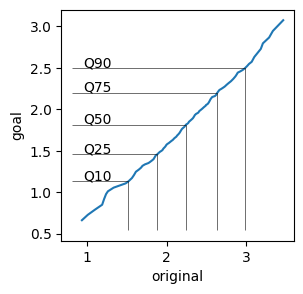

In [6]:
cnpl.splineplot(file_name = files[3],
                channel = "Nd144Di",
                x_scale = "linear",
                y_scale = "linear",
                figsize = (3,3))